In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split,GridSearchCV, RepeatedStratifiedKFold
from scipy.stats import zscore
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
from datetime import datetime

In [3]:
el_df = pd.read_csv('dataset_group.csv')
el_df.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [6]:
# clean up
    # duplicate, null values, outliers, ?, # .
    # categorical to numeric

**2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.**

In [4]:
#check the datatypes
el_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [11]:
#Check for the description
el_df.describe(include = "all")

,Date,Order_id,Product
count,20641,20641.000000,20641
unique,603,NaN,37
top,08-02-2019,NaN,poultry
freq,183,NaN,640
mean,NaN,575.986289,NaN
std,NaN,328.557078,NaN
min,NaN,1.000000,NaN
25%,NaN,292.000000,NaN
50%,NaN,581.000000,NaN
75%,NaN,862.000000,NaN


In [6]:
#Check for datatypes**
el_df.dtypes.value_counts()

object    2
int64     1
dtype: int64

In [7]:
#check the shape of the dataset
print('The no. of rows and the no. of columns of the dataset are {} and {} respectively '.format(el_df.shape[0],el_df.shape[1]))

The no. of rows and the no. of columns of the dataset are 20641 and 3 respectively 


In [8]:
#check for the null values
el_df.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [8]:
#check for the duplicates
el_df.duplicated().sum()

4730

In [9]:
print('The no. of duplicated records in the dataset is {} '.format(el_df.duplicated().sum()))

The no. of duplicated records in the dataset is 4730 


In [5]:
el_df.duplicated().sum()

0

####  Check for EDA

1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [12]:
cat = el_df.dtypes[el_df.dtypes=='object'].index
num = el_df.dtypes[el_df.dtypes!='object'].index

In [13]:
for i in cat:
    print (i)
    print(el_df[i].value_counts(normalize = True).round(2)*100)
    print("--------------------")

Date
08-02-2019    1.0
20-02-2019    1.0
06-03-2018    1.0
01-03-2018    1.0
17-05-2018    1.0
             ... 
16-01-2020    0.0
05-09-2019    0.0
11-03-2019    0.0
24-09-2018    0.0
26-02-2020    0.0
Name: Date, Length: 603, dtype: float64
--------------------
Product
poultry                         3.0
soda                            3.0
cereals                         3.0
ice cream                       3.0
cheeses                         3.0
waffles                         3.0
soap                            3.0
lunch meat                      3.0
bagels                          3.0
juice                           3.0
eggs                            3.0
toilet paper                    3.0
dinner rolls                    3.0
aluminum foil                   3.0
coffee/tea                      3.0
shampoo                         3.0
beef                            3.0
paper towels                    3.0
butter                          3.0
milk                            3.0
flour   

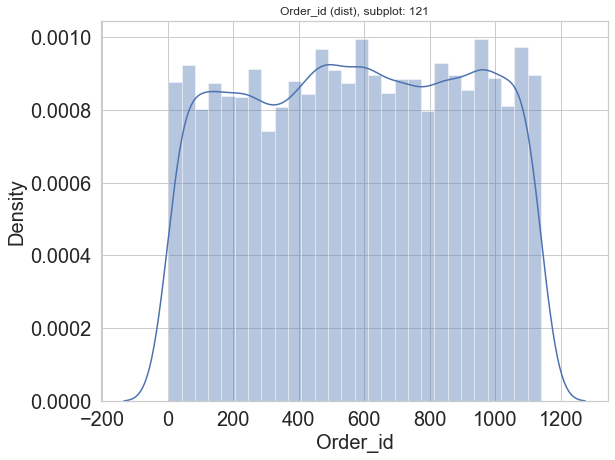

In [14]:
#Check for Distribution plots(histogram)
#fig, ax = plt.subplots(figsize=(30, 25))
fig = plt.figure(figsize=(20,7))
c = 1
for i in num:
    plt.subplot(1, 2, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, 1, 2, c))
    plt.xlabel(i, fontsize=20)
    plt.ylabel('Density',fontsize=20)
    sns.distplot(el_df[i])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.rcParams.update({'font.size': 20})
    c = c + 1

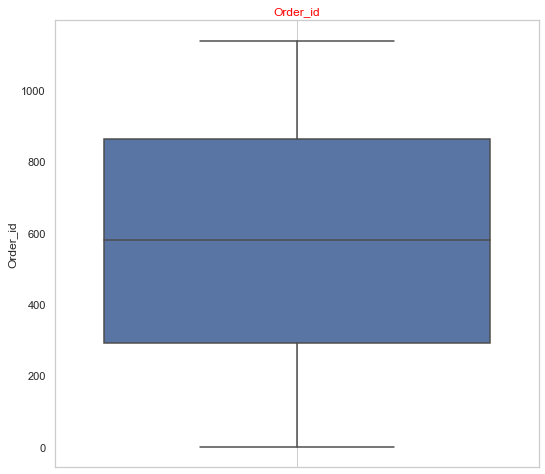

In [20]:
#**Check for Box plots, Correlation plots for the continuous columns**
data_plot=el_df[num]
fig=plt.figure(figsize=(15,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()

<AxesSubplot:>

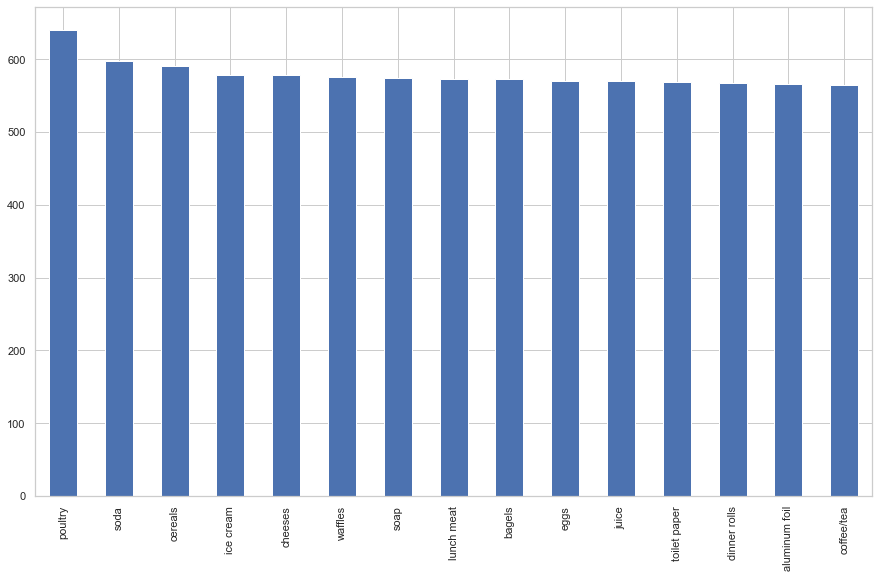

In [30]:
el_df['Product'].value_counts().sort_values(ascending =False).head(15).plot(kind = 'bar', figsize= (15,9))

<AxesSubplot:xlabel='PRODUCTLINE', ylabel='count'>

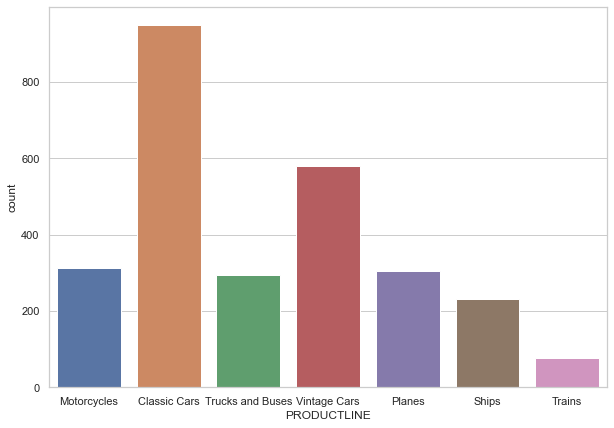

In [35]:
fig = plt.figure(figsize=(10,7))
sns.countplot(el_df['PRODUCTLINE'])

<AxesSubplot:xlabel='DEALSIZE', ylabel='count'>

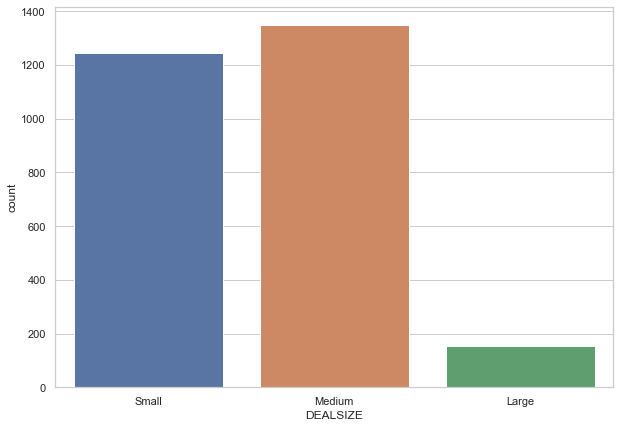

In [36]:
fig = plt.figure(figsize=(10,7))
sns.countplot(el_df['DEALSIZE'])

<AxesSubplot:>

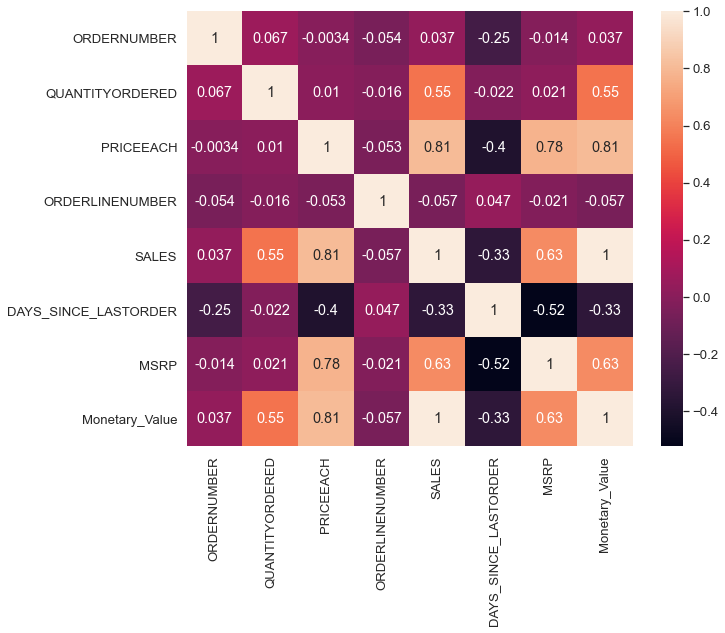

In [37]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(el_df[num].corr(),annot = True)

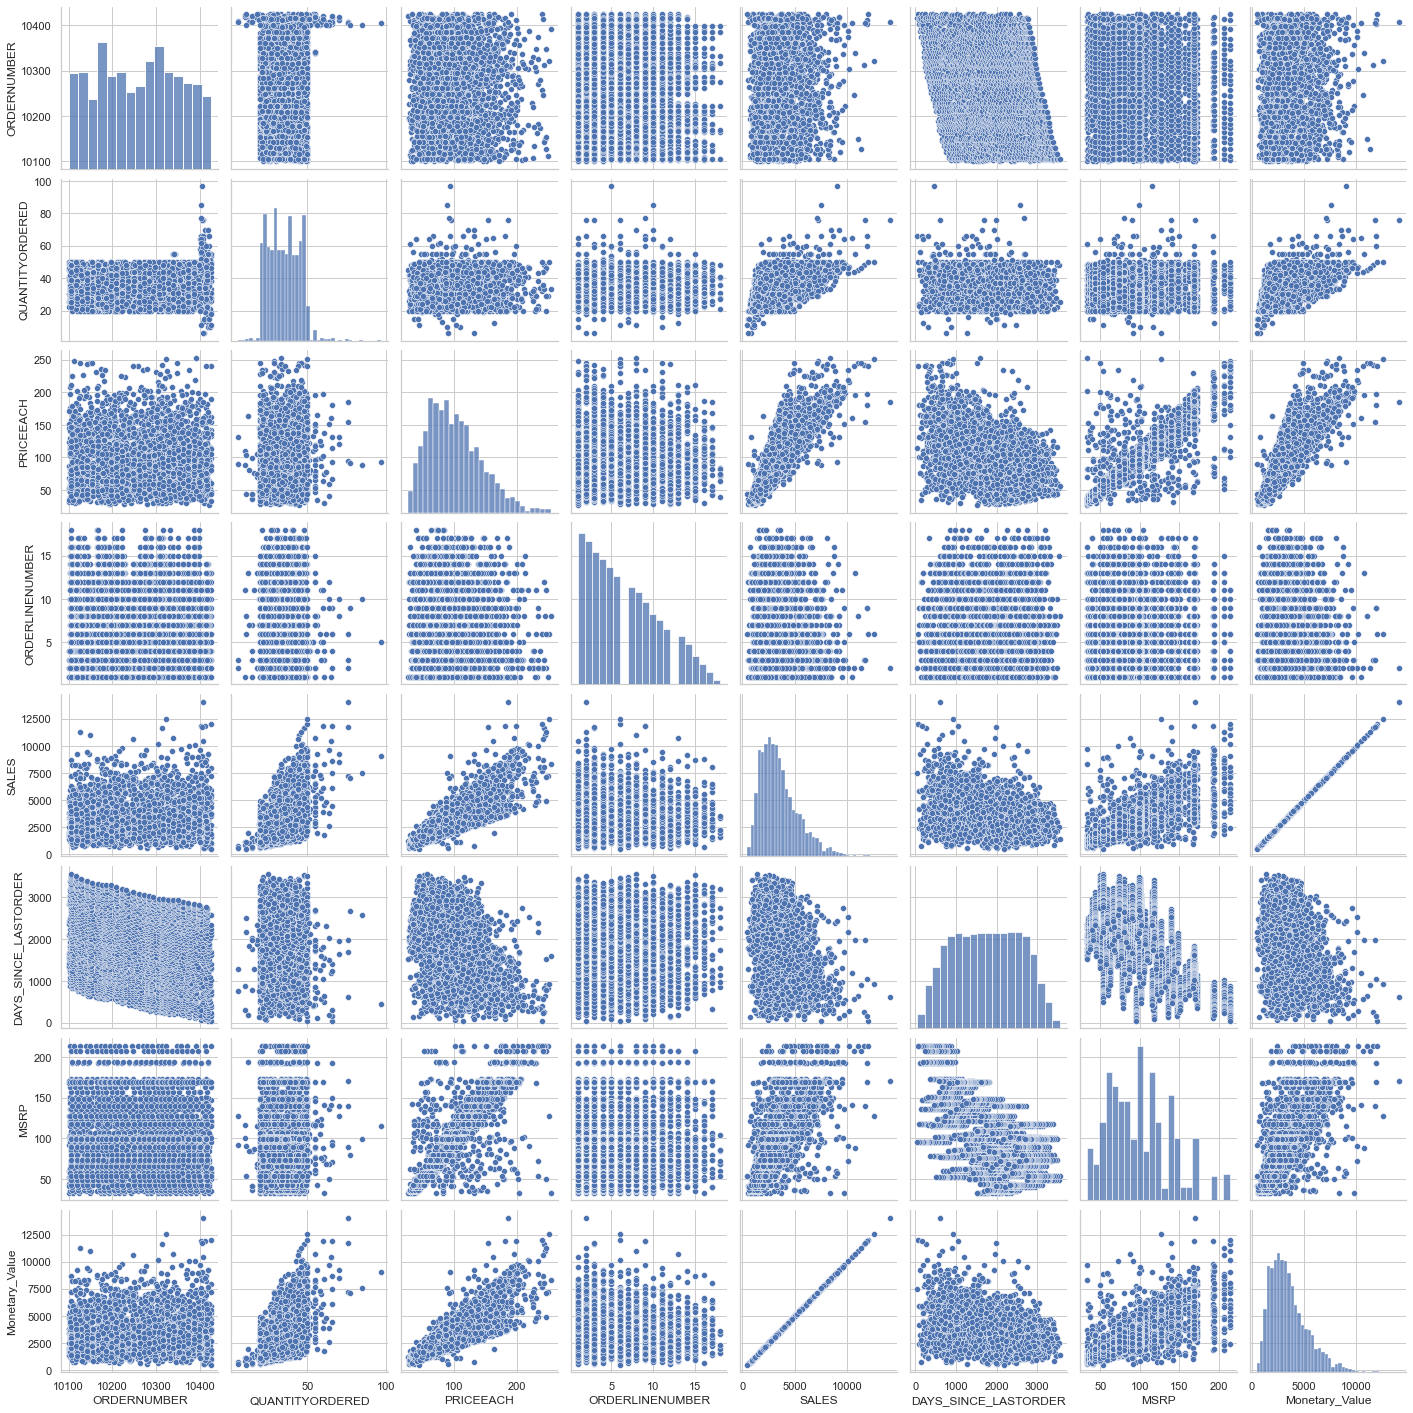

In [18]:
# Check with the pairplots for bi variate data
sns.pairplot(el_df,diag_kind='hist')
plt.show()

**1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.**

In [67]:
#Bi variate analysis for Categorical variables
eco_nat_house_table = pd.crosstab(index=el_df["economic.cond.national"], 
                          columns=el_df["economic.cond.household"])

eco_nat_house_table

economic.cond.household,1,2,3,4,5
economic.cond.national,,,,,
1,15,10,7,4,1
2,13,105,91,42,5
3,23,101,320,134,26
4,12,57,198,232,39
5,2,7,29,23,21


<AxesSubplot:xlabel='economic.cond.national'>

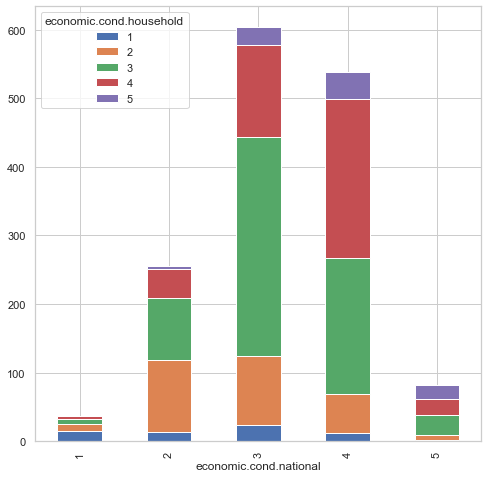

In [68]:
eco_nat_house_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [74]:
#converting all dicrete categorical data type into numerical ones to carry on with the model formaton
el_df['economic.cond.national'] = el_df['economic.cond.national'].astype('int64')
el_df['economic.cond.household'] = el_df['economic.cond.household'].astype('int64')
el_df['Blair'] = el_df['Blair'].astype('int64')
el_df['Hague'] = el_df['Hague'].astype('int64')
el_df['Europe'] = el_df['Europe'].astype('int64')
el_df['political.knowledge'] = el_df['political.knowledge'].astype('int64')

In [6]:
#**Convert Object datatypes to categorical** using encoding
el_df['vote'] = pd.get_dummies(el_df['vote'],drop_first= True)
el_df['gender'] = pd.get_dummies(el_df['gender'],drop_first= True)

In [6]:
el_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   uint8
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 86.5 KB


In [4]:
el_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Monetary_Value
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,2871.00
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,2765.90
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,3884.34
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,3746.70
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,3479.76


In [79]:
num = el_df.dtypes[el_df.dtypes!='object'].index

In [39]:
el_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'Monetary_Value'],
      dtype='object')

In [9]:
rr = el_df['ORDERDATE'].days
rr

AttributeError: 'Series' object has no attribute 'days'

In [8]:
df = el_df.groupby(['ORDERNUMBER','CUSTOMERNAME'],as_index=False).agg({'DAYS_SINCE_LASTORDER':['max']})
df.head(10)

,ORDERNUMBER,CUSTOMERNAME,DAYS_SINCE_LASTORDER
,,,max
0,10100,Online Diecast Creations Co.,2836
1,10101,"Blauer See Auto, Co.",2434
2,10102,Vitachrome Inc.,1351
3,10103,Baane Mini Imports,3393
4,10104,Euro Shopping Channel,3186
5,10105,Danish Wholesale Imports,3562
6,10106,Rovelli Gifts,3530
7,10107,Land of Toys Inc.,2932
8,10108,Cruz & Sons Co.,3181


In [40]:
# Recency
df_recency = el_df.groupby(by='CUSTOMERNAME',
                        as_index=False)['ORDERDATE'].max()

df_recency
# df_recency.columns = ['CUSTOMERNAME', 'LastPurchaseDate']
# recent_date = df_recency['LastPurchaseDate'].max()
# df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
#     lambda x: (recent_date - x).days)
# df_recency.head()


,CUSTOMERNAME,ORDERDATE
0,"AV Stores, Co.",2019-11-17
1,Alpha Cognac,2020-03-28
2,Amica Models & Co.,2019-09-09
3,"Anna's Decorations, Ltd",2020-03-09
4,Atelier graphique,2019-11-25
...,...,...
84,"Vida Sport, Ltd",2019-08-30
85,Vitachrome Inc.,2019-11-05
86,"Volvo Model Replicas, Co",2019-11-19
87,West Coast Collectables Co.,2019-01-29


In [ ]:
#Frequency

frequency_df = df.drop_duplicates().groupby(
    by=['Customer Name'], as_index=False)['Order Date'].count()
frequency_df.columns = ['CustomerName', 'Frequency']
frequency_df.head()

In [ ]:
#Monetary

df['Total'] = df['Sales']*df['Quantity']
monetary_df = df.groupby(by='Customer Name', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
monetary_df.head()